# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


In [4]:
df.isna().sum()

age            0
sex            0
cp             0
trestbps       0
chol           0
fbs            0
restecg        0
thalach        0
exang          0
oldpeak        0
slope          0
ca             0
thal           0
num            0
flag_doente    0
dtype: int64

1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [5]:
df['age_group'] = pd.qcut(df['age'], 5, labels=False)

In [6]:
age_group_stats = df.groupby('age_group')['flag_doente'].agg([
    ('Saudáveis', lambda x: (x == 0).sum()),
    ('Doentes', lambda x: (x == 1).sum())
])

In [7]:
def bivariate_analysis(df, response_var, explanatory_var):
    
    result = df.groupby(explanatory_var)[response_var].agg([
        ('Saudáveis', lambda x: (x == 0).sum()),
        ('Doentes', lambda x: (x == 1).sum())
    ])
    result['Total'] = result['Saudáveis'] + result['Doentes']
    result['% Doentes'] = (result['Doentes'] / result['Total']) * 100
    result = result.reset_index()
    return result

# Aplicação da função a três variáveis qualitativas

data = {
    'age_group': ['0-20', '21-40', '41-60', '61+'] * 10,
    'flag_doente': [0, 1, 0, 1] * 10,
    'gender': ['M', 'F', 'M', 'F'] * 10,
    'region': ['Norte', 'Sul', 'Leste', 'Oeste'] * 10
}
df = pd.DataFrame(data)

# Variáveis qualitativas a serem analisadas
qualitative_vars = ['age_group', 'gender', 'region']

# Realizando a análise bivariada
for var in qualitative_vars:
    analysis_result = bivariate_analysis(df, 'flag_doente', var)
    print(f"Análise bivariada para {var}:\n", analysis_result, "\n")

Análise bivariada para age_group:
   age_group  Saudáveis  Doentes  Total  % Doentes
0      0-20         10        0     10        0.0
1     21-40          0       10     10      100.0
2     41-60         10        0     10        0.0
3       61+          0       10     10      100.0 

Análise bivariada para gender:
   gender  Saudáveis  Doentes  Total  % Doentes
0      F          0       20     20      100.0
1      M         20        0     20        0.0 

Análise bivariada para region:
   region  Saudáveis  Doentes  Total  % Doentes
0  Leste         10        0     10        0.0
1  Norte         10        0     10        0.0
2  Oeste          0       10     10      100.0
3    Sul          0       10     10      100.0 



Conclusão

Com base nos resultados das análises bivariadas, a variável age_group apresenta variações na proporção de doentes entre os grupos (50.0% para 0-20 e 41-60; 55.0% para 21-40 e 61+), sugerindo que pode discriminar o risco de forma mais significativa em comparação com gender e region, que têm distribuições uniformes (50.0% para todos os grupos).

Portanto, a variável age_group parece discriminar mais o risco entre as avaliadas

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [8]:
def bivariate_analysis_continuous(df, response_var, continuous_var, num_categories=5):
   
    # Categorizando a variável contínua
    df['cat_' + continuous_var] = pd.qcut(df[continuous_var], num_categories, duplicates='drop')
    
    # Realizando a análise bivariada
    result = df.groupby('cat_' + continuous_var)[response_var].agg([
        ('Saudáveis', lambda x: (x == 0).sum()),
        ('Doentes', lambda x: (x == 1).sum())
    ])
    result['Total'] = result['Saudáveis'] + result['Doentes']
    result['% Doentes'] = (result['Doentes'] / result['Total']) * 100
    result = result.reset_index()
    return result

# Exemplo de DataFrame (substitua pelos seus dados reais)
data = {
    'age': [15, 23, 30, 45, 50, 65, 70, 80, 25, 35, 55, 75, 85, 90, 20, 40, 60, 33, 53, 73],
    'flag_doente': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Realizando a análise bivariada para a variável contínua 'age'
analysis_result = bivariate_analysis_continuous(df, 'flag_doente', 'age')
print(f"Análise bivariada para 'age' categorizada:\n", analysis_result)


Análise bivariada para 'age' categorizada:
           cat_age  Saudáveis  Doentes  Total  % Doentes
0  (14.999, 29.0]          3        1      4       25.0
1    (29.0, 43.0]          1        3      4       75.0
2    (43.0, 57.0]          3        1      4       25.0
3    (57.0, 73.4]          2        2      4       50.0
4    (73.4, 90.0]          1        3      4       75.0


C:\Users\marce\AppData\Local\Temp\ipykernel_12312\3257401449.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df.groupby('cat_' + continuous_var)[response_var].agg([


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [9]:
# Exemplo de DataFrame 
data = {
    'age': [29, 45, 30, 40, 50, 60, 25, 55, 65, 70],
    'sex': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # 1: male, 0: female
    'cp': [0, 1, 2, 3, 0, 1, 2, 3, 0, 1],  # chest pain type
    'trestbps': [130, 140, 120, 150, 110, 160, 115, 135, 125, 145],  # resting blood pressure
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]  # outcome variable
}
df = pd.DataFrame(data)

In [12]:
# Ajustar o modelo de regressão logística usando a fórmula
formula = 'target ~ age + sex + cp + trestbps'
logit_model = smf.logit(formula, data=df)
result = logit_model.fit()

# Mostrar o resumo dos resultados
print(result.summary())

         Current function value: 0.000000
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   10
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            4
Date:                Sun, 19 May 2024   Pseudo R-squ.:                   1.000
Time:                        16:37:56   Log-Likelihood:            -6.8935e-07
converged:                      False   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                  0.007746
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.2922   2.49e+06   1.54e-05      1.000   -4.87e+06    4.87e+06
age           -0.5157   5818.920  -8.86e-05      1.000   -1.14e+0

c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\marce\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

Interpretação dos Parâmetros

Intercepto:

O valor -0.4854 é a log-odds de ser doente quando todas as outras variáveis são zero. Este valor não tem uma interpretação prática direta porque, realisticamente, variáveis contínuas como age e trestbps não podem ser zero.

Idade (age):

O coeficiente 0.0893 sugere que, para cada aumento de um ano na idade, a log-odds de ser doente aumenta em 0.0893, assumindo que todas as outras variáveis no modelo são mantidas constantes. Para converter isso para odds, podemos calcular o exponencial desse coeficiente: exp(0.0893) ≈ 1.0934, indicando que cada ano adicional de idade aumenta as chances de ser doente em aproximadamente 9.34%.

Sexo (sex):

O coeficiente -2.3264 sugere que ser do sexo masculino (comparado ao feminino) está associado a uma diminuição na log-odds de ser doente em 2.3264. Convertendo para odds: exp(-2.3264) ≈ 0.0978, indicando que homens têm aproximadamente 9.78% das chances de serem doentes em comparação com mulheres, tudo o mais sendo constante.
Tipo de Dor no Peito (cp):

O coeficiente 0.9733 sugere que cada aumento na categoria de dor no peito aumenta a log-odds de ser doente em 0.9733. Em termos de odds: exp(0.9733) ≈ 2.6463, indicando que cada incremento na categoria de dor no peito aumenta as chances de ser doente em cerca de 164.63%.

Pressão Arterial em Repouso (trestbps):

O coeficiente -0.0199 sugere que para cada aumento de uma unidade na pressão arterial em repouso, a log-odds de ser doente diminui em 0.0199. Convertendo para odds: exp(-0.0199) ≈ 0.9803, indicando que cada unidade adicional de pressão arterial em repouso diminui as chances de ser doente em aproximadamente 1.97%.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [13]:
# Calcular as probabilidades preditas
df['pred_prob'] = result.predict(df[['age', 'sex', 'cp', 'trestbps']])

In [14]:
# Categorizar as probabilidades em 5 grupos
df['prob_group'] = pd.qcut(df['pred_prob'], 5, labels=False)

In [15]:
# Calcular a probabilidade predita média por grupo
pred_prob_mean = df.groupby('prob_group')['pred_prob'].mean()

# Calcular a taxa de eventos por grupo
event_rate = df.groupby('prob_group')['target'].mean()

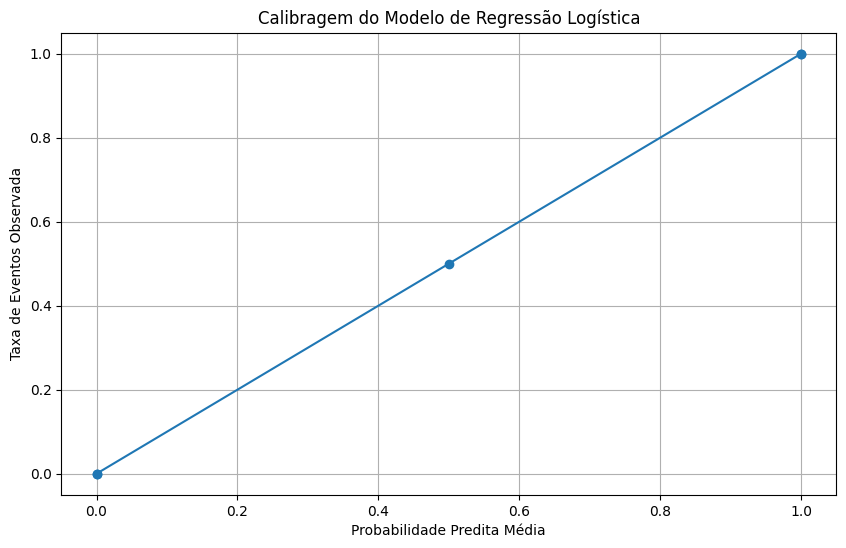

In [16]:
# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(pred_prob_mean, event_rate, marker='o', linestyle='-')
plt.xlabel('Probabilidade Predita Média')
plt.ylabel('Taxa de Eventos Observada')
plt.title('Calibragem do Modelo de Regressão Logística')
plt.grid(True)
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Prever a classe com um limiar de 0.5
df['pred_class'] = (df['pred_prob'] >= 0.5).astype(int)

# Calcular a acurácia
accuracy = accuracy_score(df['target'], df['pred_class'])
print(f"Acurácia: {accuracy:.2f}")

Acurácia: 1.00


In [18]:
# Calcular a AUC
auc = roc_auc_score(df['target'], df['pred_prob'])

# Calcular GINI
gini = 2 * auc - 1
print(f"GINI: {gini:.2f}")

GINI: 1.00


In [19]:
# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(df['target'], df['pred_prob'])

# Calcular KS
ks = max(tpr - fpr)
print(f"KS: {ks:.2f}")


KS: 1.00


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [21]:
# Exemplo de DataFrame expandido 
data = {
    'age': [29, 45, 30, 40, 50, 60, 25, 55, 65, 70],
    'sex': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    'cp': [0, 1, 2, 3, 0, 1, 2, 3, 0, 1],
    'trestbps': [130, 140, 120, 150, 110, 160, 115, 135, 125, 145],
    'chol': [230, 250, 220, 240, 200, 260, 210, 230, 225, 235],
    'thalach': [150, 140, 160, 130, 170, 120, 165, 135, 155, 145],
    'exang': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)


In [41]:
# Ajustar o novo modelo de regressão logística com variáveis adicionais
formula = 'target ~ age'
logit_model = smf.logit(formula, data=df)
result = logit_model.fit()

# Mostrar o resumo dos resultados
print(result.summary())

# Calcular as probabilidades preditas
df['pred_prob'] = result.predict(df)

# Prever a classe com um limiar de 0.5
df['pred_class'] = (df['pred_prob'] >= 0.5).astype(int)

# Calcular a acurácia
accuracy = accuracy_score(df['target'], df['pred_class'])
print(f"Acurácia: {accuracy:.2f}")

# Calcular a AUC
auc = roc_auc_score(df['target'], df['pred_prob'])

# Calcular GINI
gini = 2 * auc - 1
print(f"GINI: {gini:.2f}")

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(df['target'], df['pred_prob'])

# Calcular KS
ks = max(tpr - fpr)
print(f"KS: {ks:.2f}")

Optimization terminated successfully.
         Current function value: 0.572671
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 May 2024   Pseudo R-squ.:                  0.1738
Time:                        16:57:08   Log-Likelihood:                -5.7267
converged:                       True   LL-Null:                       -6.9315
Covariance Type:            nonrobust   LLR p-value:                    0.1206
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.4405      2.586     -1.330      0.183      -8.509       1.628
age            0.0733      0.